# Clustering

### 목적
유사한 특징을 가진 데이터끼리 그룹으로 묶어 분석한다.

### Algorithms
- K-Means
- K-Medoids
- Layerd Clustering
- DBSCAN

### Dataset
Wine Dataset

### Example
음식점 추천, 동아리 추천, 고객 세분화, 문서 클러스터링

- numpy: 파이썬에서 대규모 다차원 배열을 처리할 수 있는 라이브러리
- matplotlib.pyplot: 그래프를 그리는데 사용되는 2D, 3D 플롯팅 라이브러리
- seaborn: matplotlib 기반 통계 시각화 라이브러리
- scikit-learn: 파이썬에서 가장 널리 사용되는 머신러닝 라이브러리

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score

## 데이터 불러오기, 표준화

- StandardScaler: 각 특성별로 평균은 0, 표준 편차는 1로 만든다.
- StandardScaler(): 객체 생성
- fit(): 데이터에 적합한 표준화 매개 변수(평균, 표준편차) 계산
- transform(): 실제 데이터에 표준화 적용

In [49]:
# 와인 데이터셋 불러오기
wine = datasets.load_wine()
x = wine.data

# 데이터 표준화
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

np.mean(x, axis=0)

np.mean(x_scaled, axis=0)

array([ 7.84141790e-15,  2.44498554e-16, -4.05917497e-15, -7.11041712e-17,
       -2.49488320e-17, -1.95536471e-16,  9.44313292e-16, -4.17892936e-16,
       -1.54059038e-15, -4.12903170e-16,  1.39838203e-15,  2.12688793e-15,
       -6.98567296e-17])

## 클러스터링 모델 정의

- n_clusters: 클러스터의 개수
- random_state: 초기 클러스터 중심 선택에 사용되는 무작위 시드 값
- eps: 클러스터에 속하는 점들 간의 최대 거리
- min_samples: 핵심 점을 결정하기 위한 이웃 점의 최소 개수

In [50]:
# 클러스터링 모델 정의
k_means = KMeans(n_clusters=3, random_state=42)
k_medoids = KMedoids(n_clusters=3, random_state=42)
hierarchical = AgglomerativeClustering(n_clusters=3)
dbscan = DBSCAN(eps=2, min_samples=5)

## 클러스터링 모델 학습

- fit_predict(): 클러스터링 수행 및 레이블 예측
- silhouette_score(): 클러스터링의 성능 평가를 위해 실루엣 계수 계산

In [51]:
# 클러스터링 모델 학습
k_means_clusters = k_means.fit_predict(x_scaled)
k_medoids_clusters = k_medoids.fit_predict(x_scaled)
hierarchical_clusters = hierarchical.fit_predict(x_scaled)
dbscan_clusters = dbscan.fit_predict(x_scaled)

# 실루엣 점수 계산
k_means_silhouette = silhouette_score(x_scaled, k_means_clusters)
k_medoids_silhouette = silhouette_score(x_scaled, k_medoids_clusters)
hierarchical_silhouette = silhouette_score(x_scaled, hierarchical_clusters)
dbscan_silhouette = silhouette_score(x_scaled, dbscan_clusters)

# 결과 출력
print(f"K-Means 실루엣 점수: {k_means_silhouette: .2f}")
print(f"K-Medoids 실루엣 점수: {k_medoids_silhouette: .2f}")
print(f"계층적 클러스터링 실루엣 점수: {hierarchical_silhouette: .2f}")
print(f"DBSCAN 실루엣 점수: {dbscan_silhouette: .2f}")

K-Means 실루엣 점수:  0.28
K-Medoids 실루엣 점수:  0.27
계층적 클러스터링 실루엣 점수:  0.28
DBSCAN 실루엣 점수: -0.03


/Users/jcw/Develop/DataAnalysisLecture/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## 클러스터링 시각화

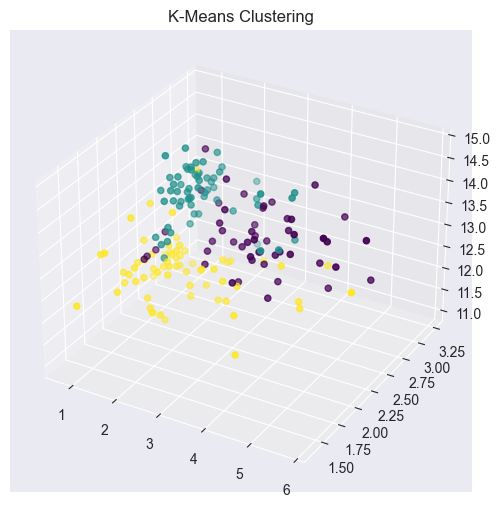

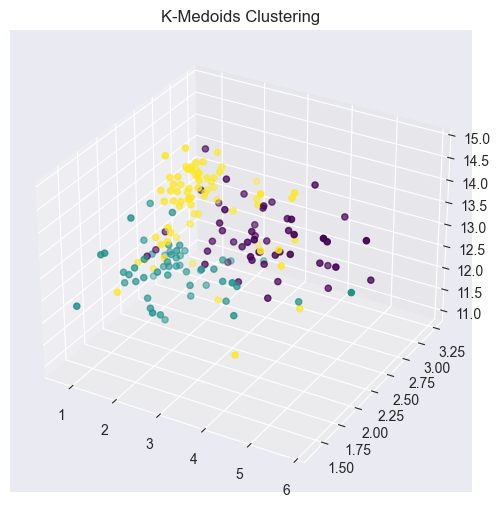

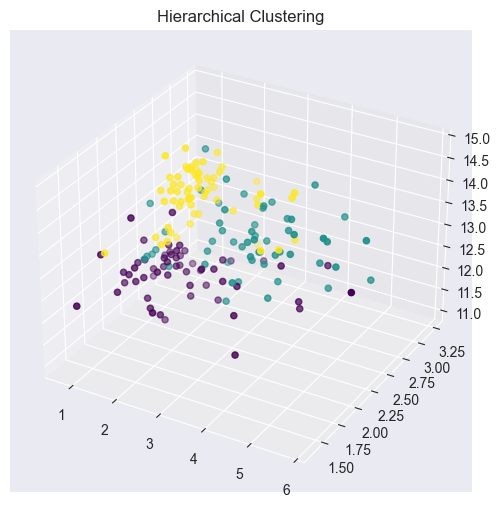

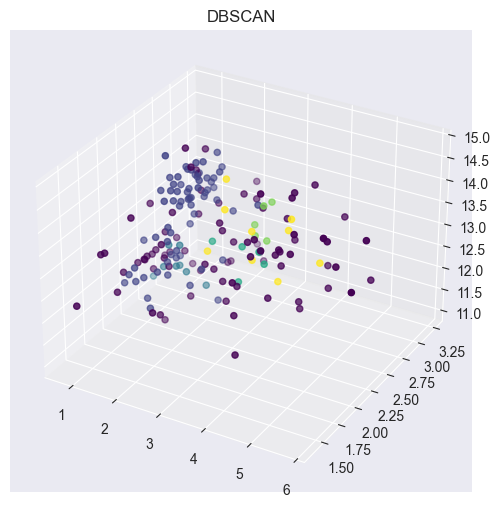

In [52]:
# 시각화 함수
def plot_clusters(x, labels, title):
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xs=x[:, 1], ys=x[:, 2], zs=x[:, 0], c=labels, cmap='viridis')
    # plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis')
    plt.title(title)
    plt.show()

# K-Means 시각화
plot_clusters(x, k_means.labels_, 'K-Means Clustering')

# K-Medoids 시각화
plot_clusters(x, k_medoids.labels_, 'K-Medoids Clustering')

# 계층적 클러스터링 시각화
plot_clusters(x, hierarchical.labels_, 'Hierarchical Clustering')

# DBSCAN 시각화
plot_clusters(x, dbscan.labels_, 'DBSCAN')

## 성능 튜닝

> 실루엣 계수가 낮은 이유는 클러스터링 알고리즘이 데이터셋에 잘 맞지 않거나, 파라미터 설정이 적절하지 않기 때문이다.

**데이터 전처리 및 특성 선택**
- 데이터셋의 전처리 과정에서 이상치 제거, 정규화, 표준화와 같은 방법을 사용하여 데이터의 특성을 조정할 수 있으며, 중요한 특성들만 선택하여 차원 축소를 시도해 볼 수 있다.

**하이퍼 파라미터 튜닝**
- 각 알고리즘의 파라미터를 조정하여 성능을 개선할 수 있다. K-Means와 K-Medoids, 계층적 클러스터링의 경우 클러스터 개수를 변경할 수 있고, DBSCAN에서는 eps와 min_samples 파라미터를 조정할 수 있다.

/Users/jcw/Develop/DataAnalysisLecture/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means 실루엣 점수:  0.56
K-Medoids 실루엣 점수:  0.56
계층적 클러스터링 실루엣 점수:  0.56


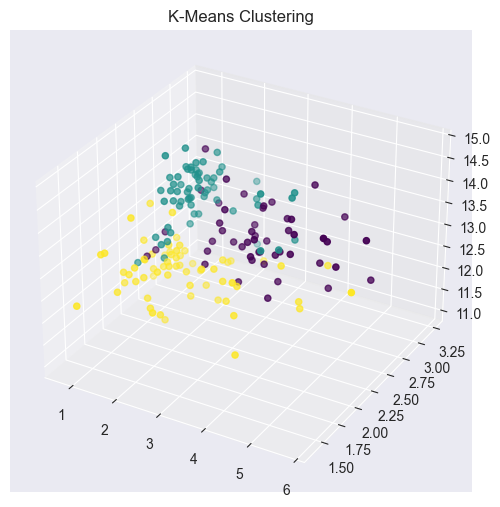

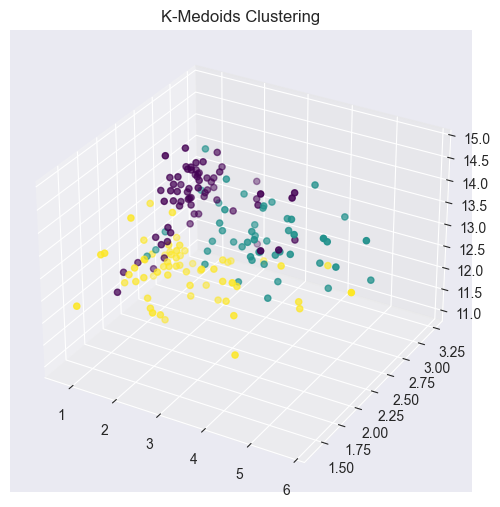

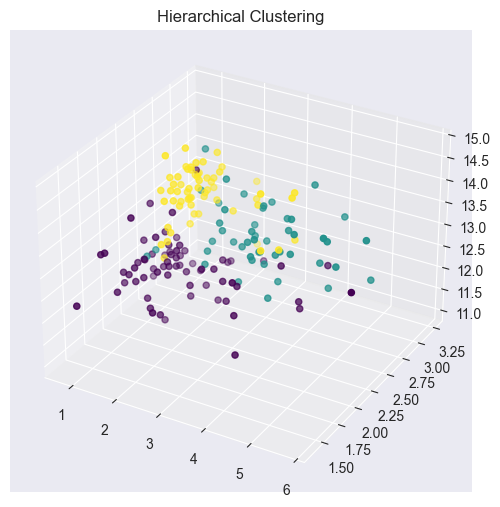

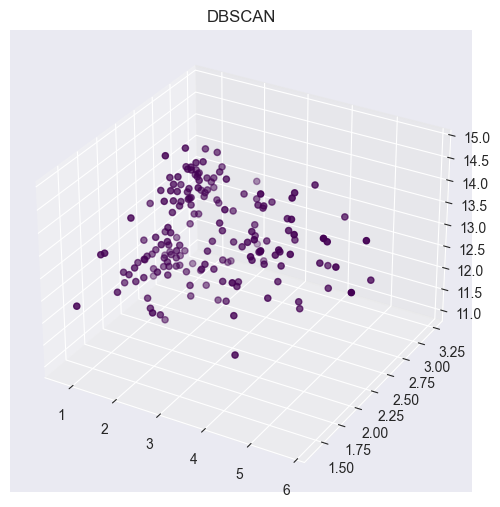

In [53]:
from sklearn.decomposition import PCA

wine = datasets.load_wine()
x = wine.data

scaler = StandardScaler()
x_std = scaler.fit_transform(x)

# 주성분 분석 (PCA) 적용
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_std)

# 클러스터 개수 설정
n_clusters = 3

# 클러스터링 알고리즘 적용
k_means = KMeans(n_clusters=n_clusters)
k_medoids = KMedoids(n_clusters=n_clusters, random_state=42)
hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
dbscan = DBSCAN(eps=3, min_samples=5)

k_means_clusters = k_means.fit_predict(x_pca)
k_medoids_clusters = k_medoids.fit_predict(x_pca)
hierarchical_clusters = hierarchical.fit_predict(x_pca)
dbscan_clusters = dbscan.fit_predict(x_pca)

# 실루엣 점수 계산
k_means_silhouette = silhouette_score(x_pca, k_means_clusters)
k_medoids_silhouette = silhouette_score(x_pca, k_medoids_clusters)
hierarchical_silhouette = silhouette_score(x_pca, hierarchical_clusters)
# dbscan_silhouette = silhouette_score(x_pca, dbscan_clusters)

print(f"K-Means 실루엣 점수: {k_means_silhouette: .2f}")
print(f"K-Medoids 실루엣 점수: {k_medoids_silhouette: .2f}")
print(f"계층적 클러스터링 실루엣 점수: {hierarchical_silhouette: .2f}")
# print(f"DBSCAN 실루엣 점수: {dbscan_silhouette: .2f}")

# K-Means 시각화
plot_clusters(x, k_means.labels_, 'K-Means Clustering')

# K-Medoids 시각화
plot_clusters(x, k_medoids.labels_, 'K-Medoids Clustering')

# 계층적 클러스터링 시각화
plot_clusters(x, hierarchical.labels_, 'Hierarchical Clustering')

# DBSCAN 시각화
plot_clusters(x, dbscan.labels_, 'DBSCAN')